## Credit Card Fraud Case Study

### Importing basic modules

### Importing Data

In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)


c:\Users\PC\Data\ads_fraud_detection


In [2]:
from config.config import *
from libs.common import *
init_notebook_mode(connected=True)
print(tf.__version__) # requires version >= 1.9.0

c:/Users/PC/Data/ads_fraud_detection


2.13.0


In [3]:
save_dir=f"{exps_dir}/exp_prj_credit_card_transactions_fraud"
if os.path.exists(save_dir) == False: 
  os.makedirs(save_dir, exist_ok=True)



In [4]:
train = pd.read_csv(f'{data_dir}/credit_card_transactions_fraud/fraudTrain.csv')
test = pd.read_csv(f'{data_dir}/credit_card_transactions_fraud/fraudTest.csv')
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
print(test.shape),print(train.shape)

(555719, 23)
(1296675, 23)


(None, None)

### Data Cleaning 

In [6]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
test.info(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

(None, None)

Converting dob,trans_date_trans_time  column in both test & train to datetime data type and creating new 'trans_date' column - 

In [9]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

In [10]:
test.trans_date.head(),test.dob.head(),train.trans_date.head(),train.dob.head()

(0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns],
 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns],
 0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

Removing unnamed column

In [11]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


### EDA, Feature Engineering

### Categorical Variable Analysis

In [12]:
total = pd.concat([test,train])
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              int6

In [13]:
total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
total["is_fraud_cat"].astype("object")

0          F
1          F
2          F
3          F
4          F
          ..
1296670    F
1296671    F
1296672    F
1296673    F
1296674    F
Name: is_fraud_cat, Length: 1852394, dtype: object

In [14]:
totalcat=total.select_dtypes(include=['object'])

In [15]:
total[totalcat.columns]

,merchant,category,first,last,gender,street,city,state,job,trans_num,is_fraud_cat
0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,F
1,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,F
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,F
3,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c,F
4,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b,F
...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,440b587732da4dc1a6395aba5fb41669,F
1296671,fraud_Abernathy and Sons,food_dining,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,F
1296672,fraud_Stiedemann Ltd,food_dining,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,483f52fe67fabef353d552c1e662974c,F
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,F


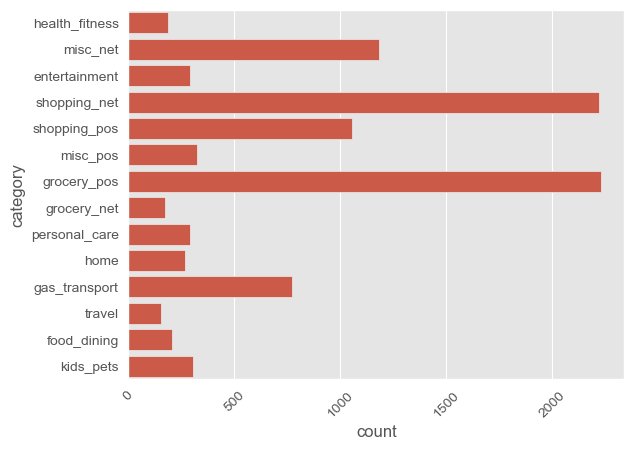

In [16]:
sns.countplot(total[total['is_fraud_cat']=="T"].category)
plt.xticks(rotation=45)
plt.show()

#### Insight- 
Most frauds occured in categories of shopping_net and grocery_pos

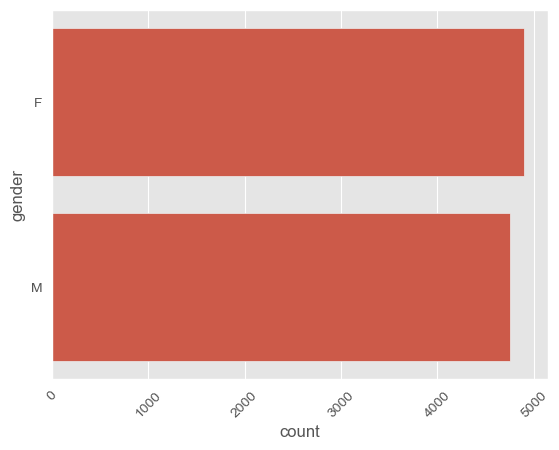

In [17]:
sns.countplot(total[total['is_fraud_cat']=="T"].gender)
plt.xticks(rotation=45)
plt.show()

#### Insight- 
Although more cases of fraud happened with female customers, the number is almost  the same for both Males and Females

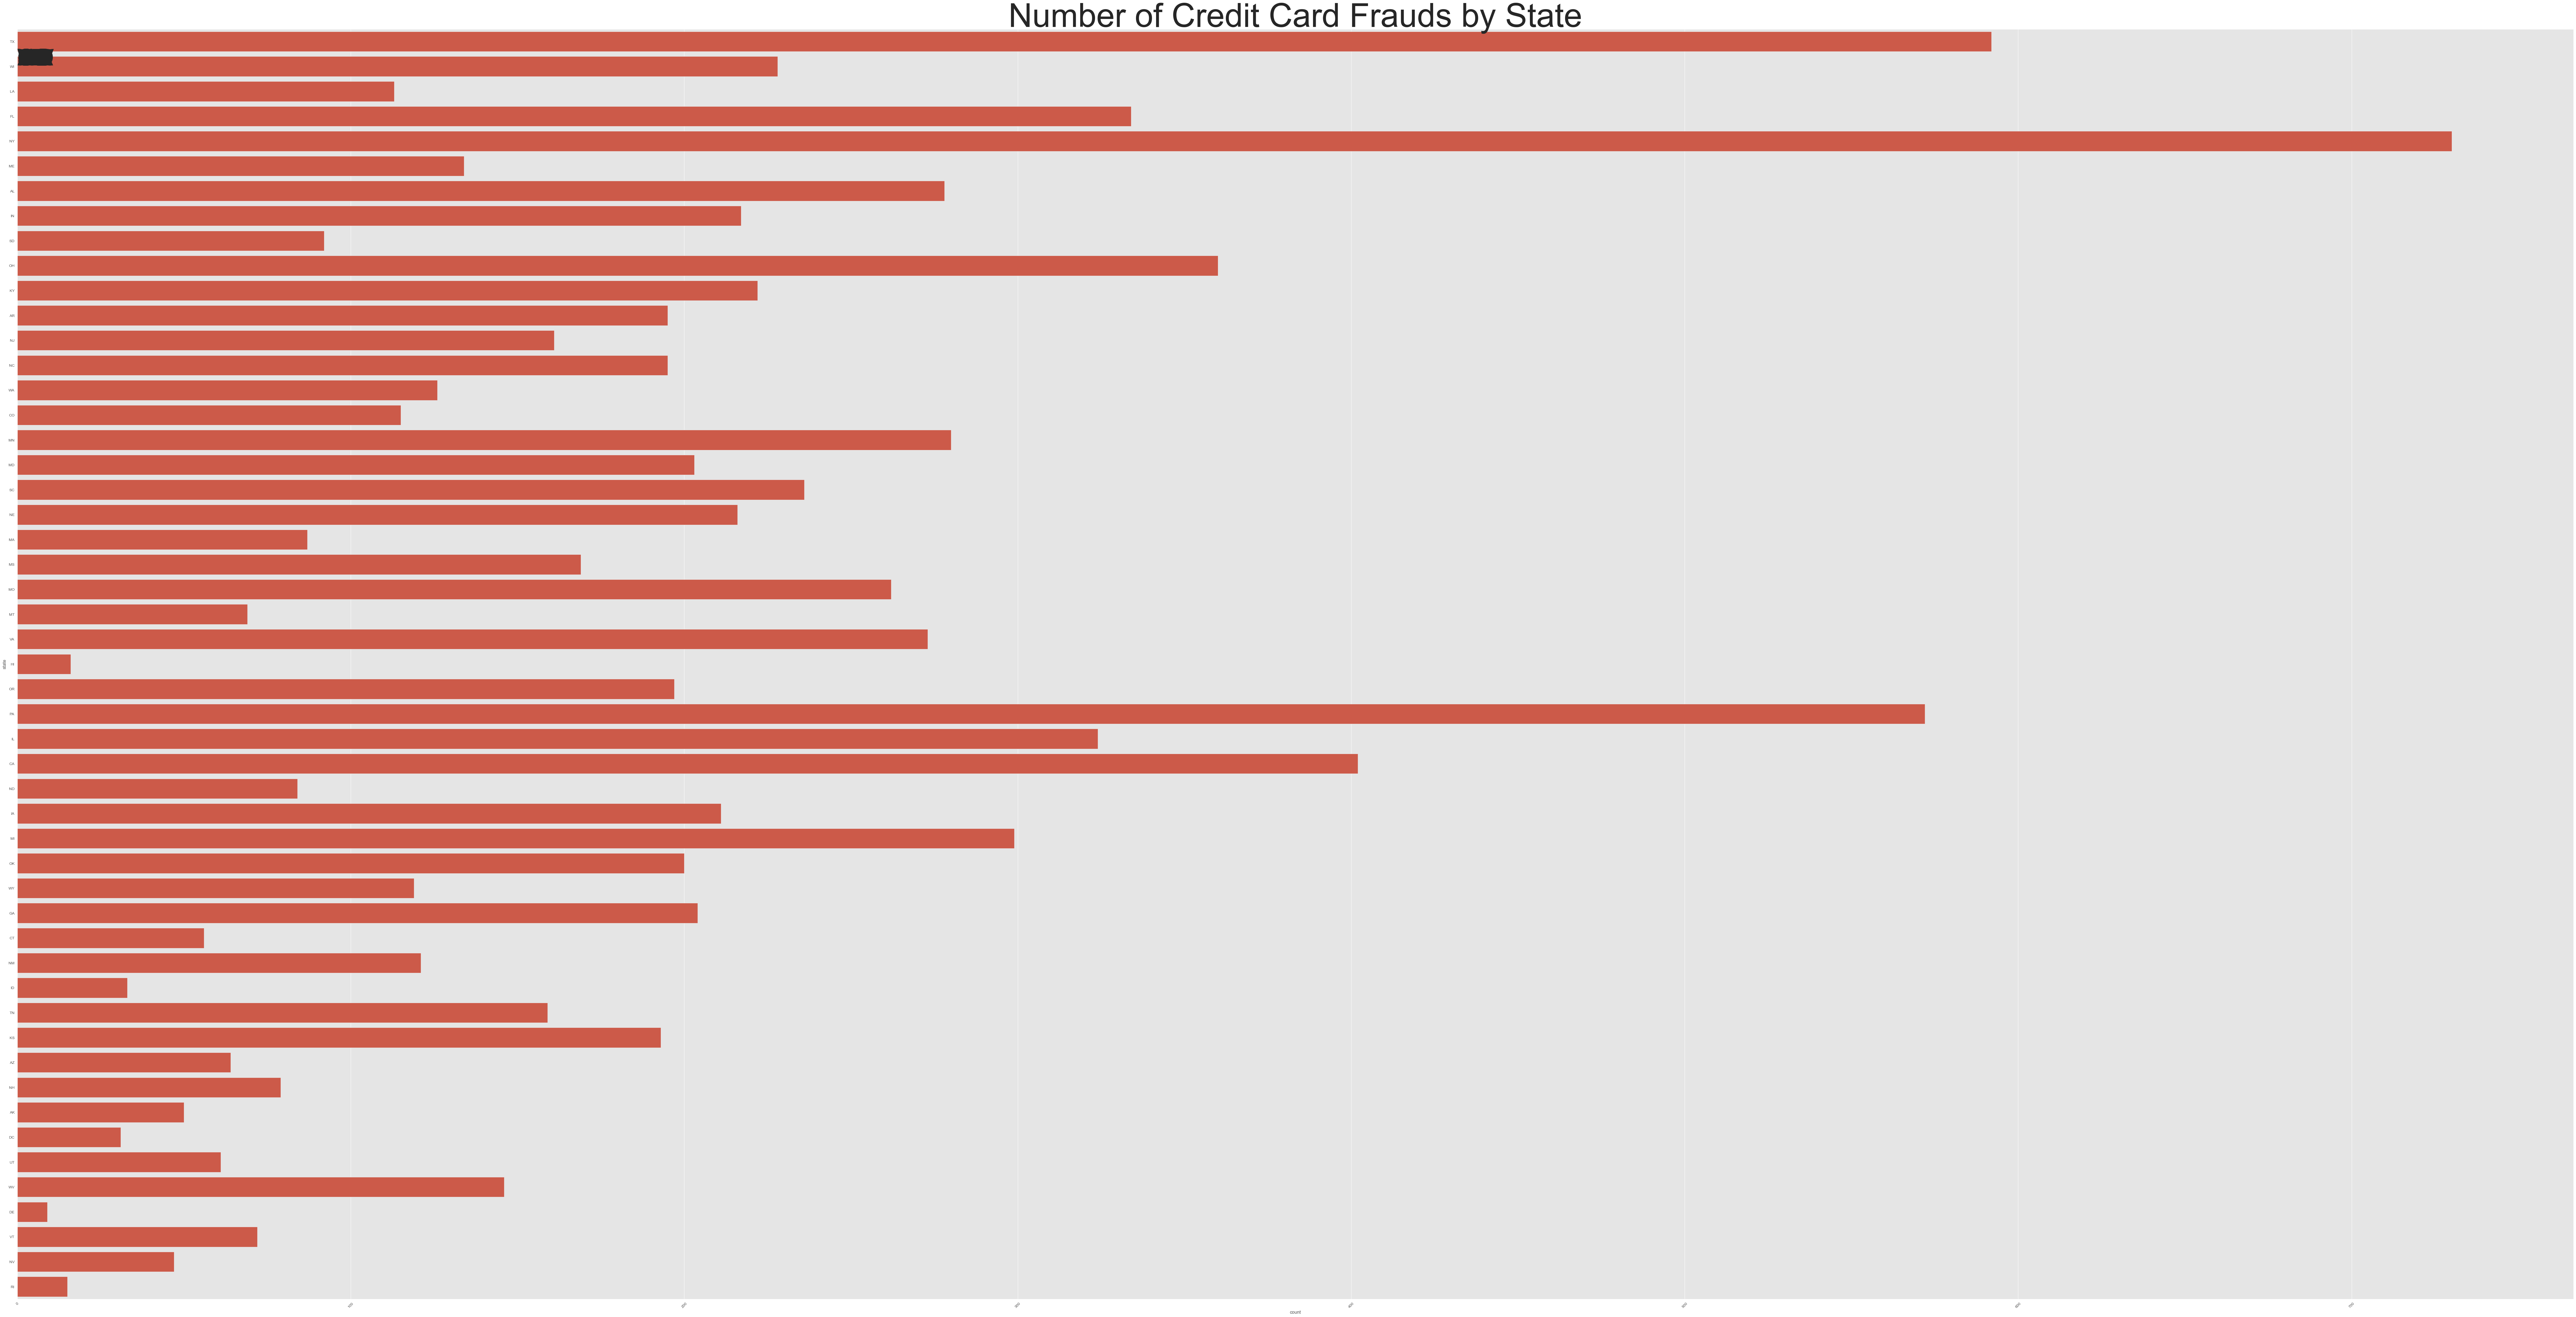

In [18]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(total[total['is_fraud_cat']=="T"].state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, total["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

#### Insight- 
States OH, TX and LA report the most number of credit card frauds

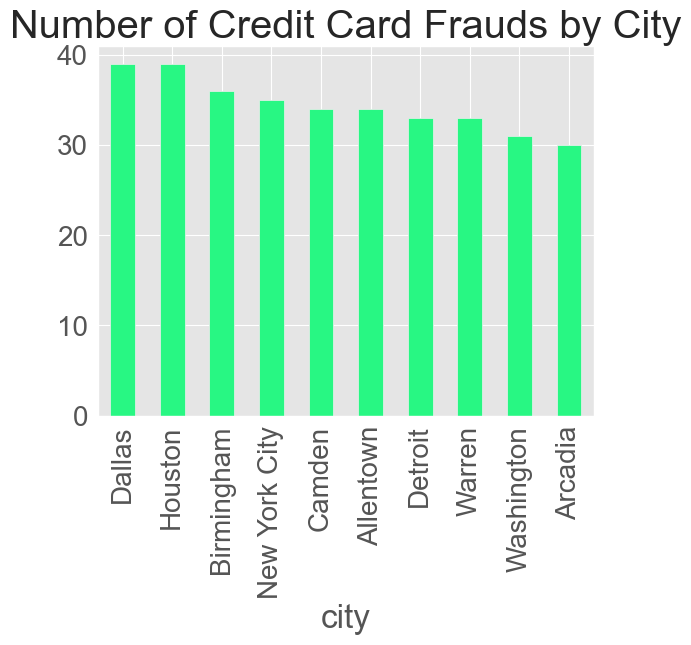

In [19]:
import random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
plt.rcParams.update({'font.size': 20})
total[total['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by City")
plt.show()

#### Insight- 
Dallas,Houston and Birmingham report the most frauds city wise.

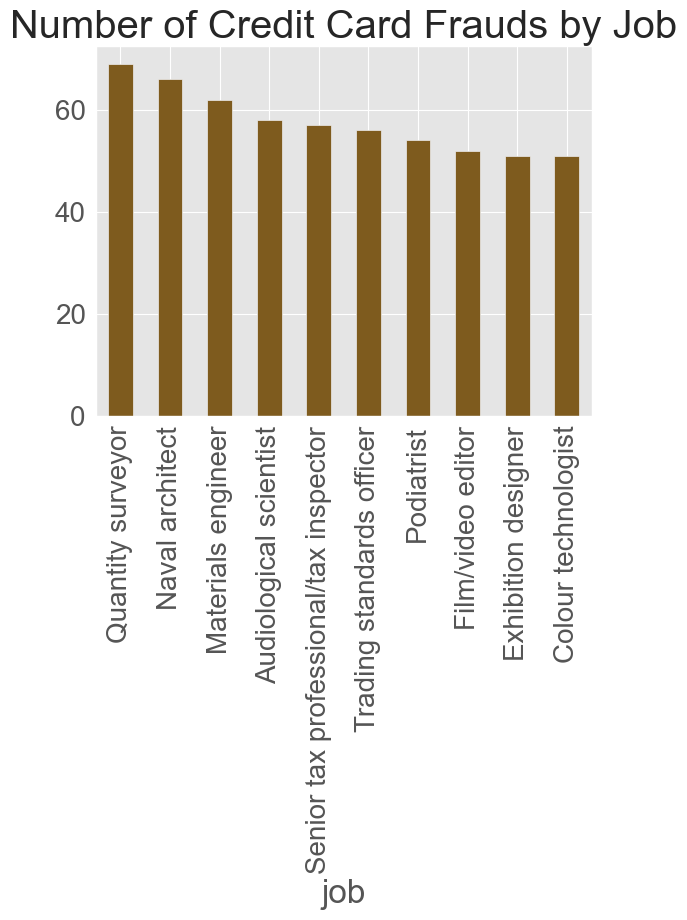

In [20]:
total[total['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by Job")
plt.show()

#### Insight- 
Most frauds occured in jobs of quantity surveyor followed by naval architect and materials engineer

### Numerical Variable Analysis
checking the spread & skewness of all numerical variables

In [21]:
del total['is_fraud_cat']
from scipy.stats import norm, skew

In [22]:
#finding numerical columns
testnum= test.select_dtypes(include=np.number)
test[testnum.columns]

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [23]:
total.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
dtype: int64

In [24]:
total[testnum.columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   amt         float64
 2   zip         int64  
 3   lat         float64
 4   long        float64
 5   city_pop    int64  
 6   unix_time   int64  
 7   merch_lat   float64
 8   merch_long  float64
 9   is_fraud    int64  
dtypes: float64(5), int64(5)
memory usage: 155.5 MB


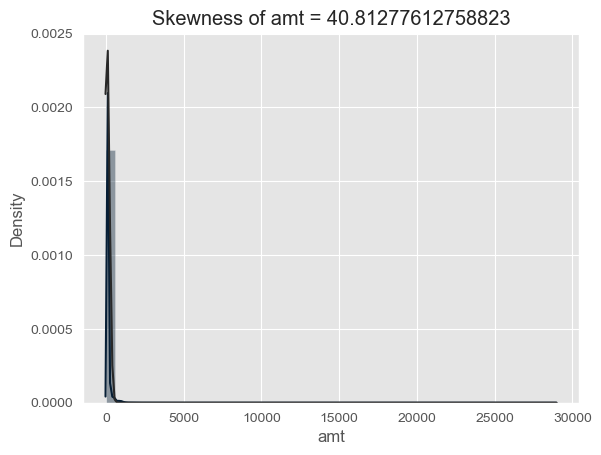

In [25]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(total['amt']))
sns.distplot(total['amt'],fit = norm,color = randomcolor())
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

#### Inference:
Most transactions are limited within a very small bracket, although transactions of large sums are very much present, which are likely to be fraud transactions.

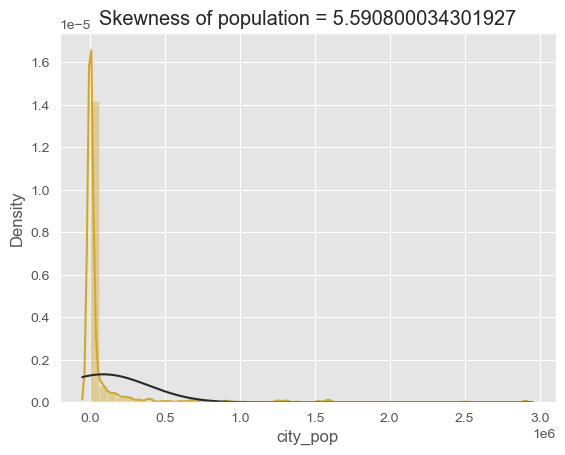

In [26]:
skewness = str(skew(total['city_pop']))
sns.distplot(total['city_pop'],fit = norm,color = randomcolor())
plt.title("Skewness of population"+" = "+skewness)
plt.show()

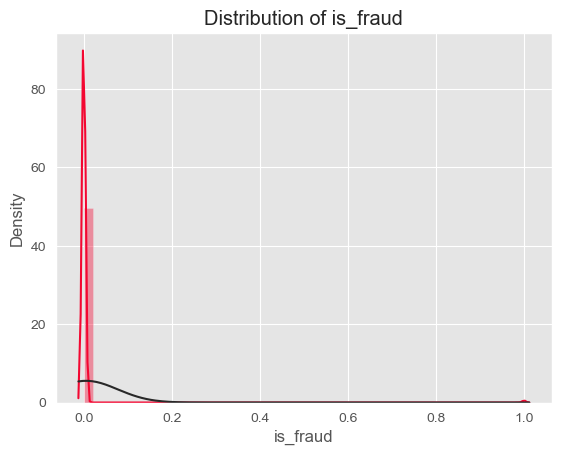

In [27]:
sns.distplot(total['is_fraud'],fit = norm,color = randomcolor())
plt.title("Distribution of is_fraud")
plt.show()


Certain numerical  columns are not needed for modeling and hence can be removed.

Moreover,a lot of the data is highly skewed.

one insight is that proportion of non fraud transactions are much much larger than fraud transactions so we are looking at an imbalanced dataset.


In [28]:
total.drop(['cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(2), object(5)
memory usage: 226.1+ MB


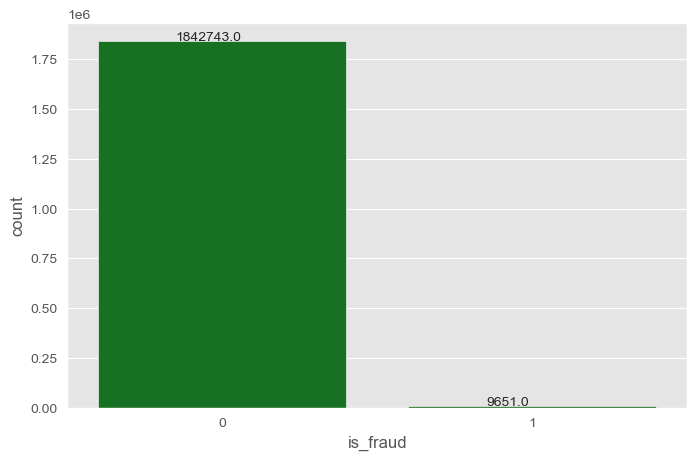

In [29]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="is_fraud", data=total,color=randomcolor())
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

only around 10,000 entries represent fraud transactions out of nearly 1.8 million entries, hence we are looking at an imbalanced dataset.

creating age variable from transaction dates and DOB.

In [30]:
total["age"] = total["trans_date"]-total["dob"]
total["age"]=total["age"].dt.days / 365.25
total["age"].head()

0    52.257358
1    30.425736
2    49.667351
3    32.908966
4    64.960986
Name: age, dtype: float64

In [31]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
 15  age                    float64       
dtypes: datetime64[ns](3), float64(6), int64(2), object(5)
memory usage: 240.3+ MB


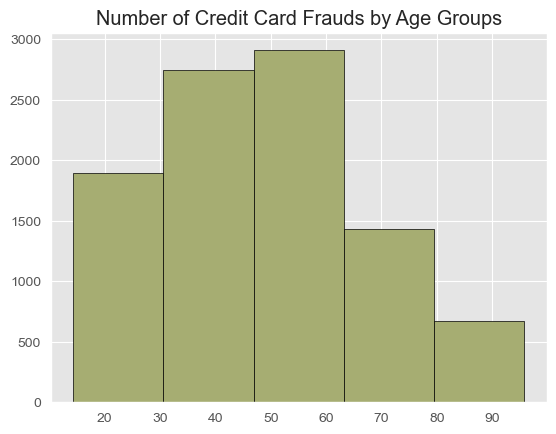

In [32]:
fraud=total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()

creating transacation month and transaction year columns

In [33]:
total['trans_month'] = pd.DatetimeIndex(total['trans_date']).month
total['trans_year'] = pd.DatetimeIndex(total['trans_date']).year

In [34]:
import calendar
total['Month_name'] = total['trans_month'].apply(lambda x: calendar.month_abbr[x])

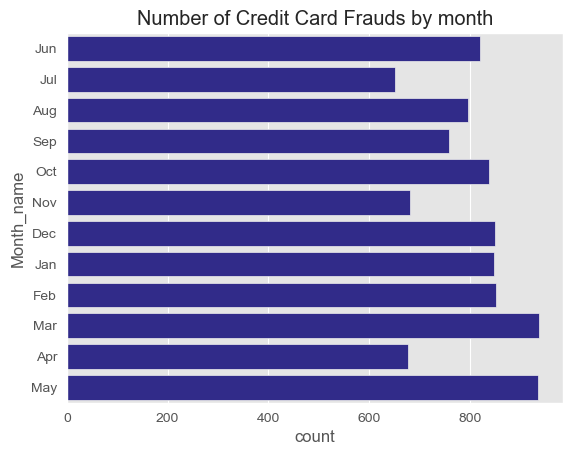

In [35]:
sns.countplot(total[total["is_fraud"]==1]["Month_name"],color=randomcolor())
plt.title("Number of Credit Card Frauds by month")
plt.show()
del total['Month_name']

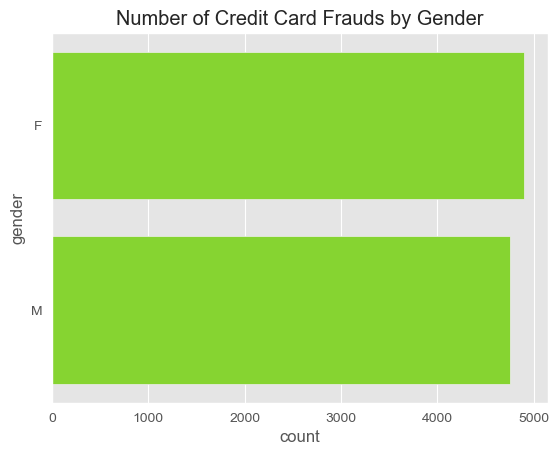

In [36]:
sns.countplot(total[total["is_fraud"]==1]["gender"],color=randomcolor())
plt.title("Number of Credit Card Frauds by Gender")
plt.show()

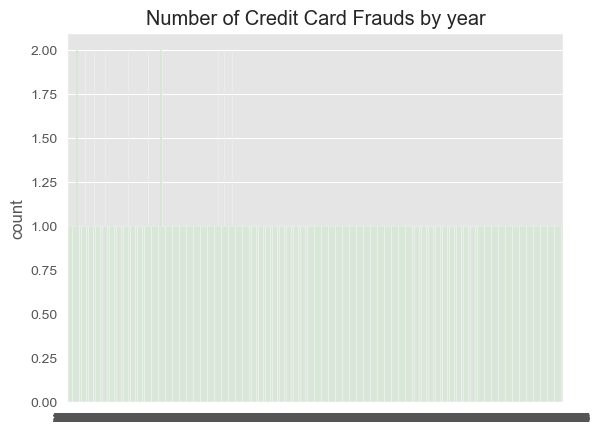

In [37]:
sns.countplot(total[total["is_fraud"]==1]["trans_year"],color=randomcolor())
plt.title("Number of Credit Card Frauds by year")
plt.show()

Finding distance from customer location to merchant location in degrees latitude and degrees longitude

In [38]:
total['latitudinal_distance'] = abs(round(total['merch_lat']-total['lat'],3))
total['longitudinal_distance'] = abs(round(total['merch_long']-total['long'],3))

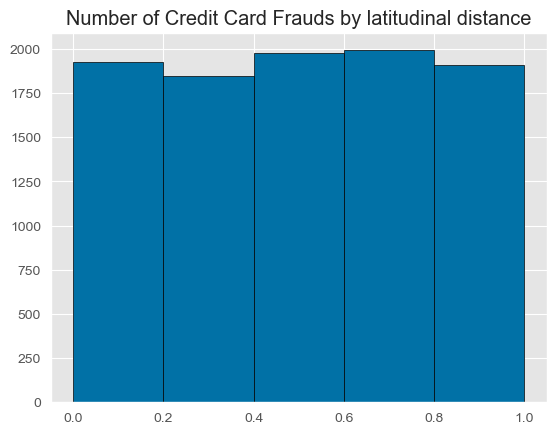

In [39]:
fraud = total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.latitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by latitudinal distance")
plt.show()

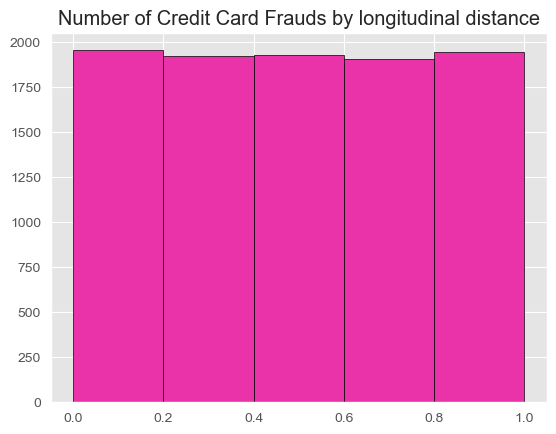

In [40]:
fig, ax = plt.subplots()
ax.hist(fraud.longitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by longitudinal distance")
plt.show()

In [41]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
 15  age                    float64       
 16  trans_month            int32         
 17  trans_year             int32         
 18  latitudinal_distance   floa

changing gender values to binary values

In [42]:
total.gender.value_counts()

gender
F    1014749
M     837645
Name: count, dtype: int64

In [43]:
total.gender=total.gender.apply(lambda x: 1 if x=="M" else 0)
total.gender.value_counts()

gender
0    1014749
1     837645
Name: count, dtype: int64

Dropping final set of variables not useful for model building

In [44]:
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
total=total.drop(drop_cols,axis=1)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   category               object 
 1   amt                    float64
 2   gender                 int64  
 3   city_pop               int64  
 4   is_fraud               int64  
 5   age                    float64
 6   trans_month            int32  
 7   trans_year             int32  
 8   latitudinal_distance   float64
 9   longitudinal_distance  float64
dtypes: float64(4), int32(2), int64(3), object(1)
memory usage: 141.3+ MB


In [45]:
total = pd.get_dummies(total,columns=['category'],drop_first=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 int64  
 3   is_fraud                 int64  
 4   age                      float64
 5   trans_month              int32  
 6   trans_year               int32  
 7   latitudinal_distance     float64
 8   longitudinal_distance    float64
 9   category_food_dining     bool   
 10  category_gas_transport   bool   
 11  category_grocery_net     bool   
 12  category_grocery_pos     bool   
 13  category_health_fitness  bool   
 14  category_home            bool   
 15  category_kids_pets       bool   
 16  category_misc_net        bool   
 17  category_misc_pos        bool   
 18  category_personal_care   bool   
 19  category_shopping_net    bool   
 20  category_shopping_pos    bool   
 21  category_trav

In [46]:
total.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52.257358,6,2020,0.020,0.265,False,False,False,False,False,False,False,False,False,True,False,False,False
1,29.84,0,302,0,30.425736,6,2020,0.870,0.476,False,False,False,False,False,False,False,False,False,True,False,False,False
2,41.28,0,34496,0,49.667351,6,2020,0.177,0.660,False,False,False,False,True,False,False,False,False,False,False,False,False
3,60.05,1,54767,0,32.908966,6,2020,0.243,0.064,False,False,False,False,False,False,False,False,True,False,False,False,False
4,3.19,1,1126,0,64.960986,6,2020,0.706,0.868,False,False,False,False,False,False,False,False,False,False,False,False,True


In [47]:
numeric_columns = list(total.select_dtypes(['number']).columns)
numeric_columns
change_tocategory=[i for i in numeric_columns if len(total[i].unique())<=46]
#change_tocategory.remove('umbrella_limit')
change_tocategory

['gender', 'is_fraud', 'trans_month', 'trans_year']

In [48]:
total[change_tocategory]=total[change_tocategory].astype('category')
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   amt                      float64 
 1   gender                   category
 2   city_pop                 int64   
 3   is_fraud                 category
 4   age                      float64 
 5   trans_month              category
 6   trans_year               category
 7   latitudinal_distance     float64 
 8   longitudinal_distance    float64 
 9   category_food_dining     bool    
 10  category_gas_transport   bool    
 11  category_grocery_net     bool    
 12  category_grocery_pos     bool    
 13  category_health_fitness  bool    
 14  category_home            bool    
 15  category_kids_pets       bool    
 16  category_misc_net        bool    
 17  category_misc_pos        bool    
 18  category_personal_care   bool    
 19  category_shopping_net    bool    
 20  category_shopping_pos    bool

In [49]:
category_columns = list(total.select_dtypes(['category']).columns)
category_columns

['gender', 'is_fraud', 'trans_month', 'trans_year']

In [50]:
total.to_csv(f'{save_dir}/data_EDA.csv', index=None)
object_columns = list(total.select_dtypes(['object']).columns)
total[object_columns]=total[object_columns].astype('category')
category_columns = list(total.select_dtypes(['category']).columns)
numeric_columns = list(total.select_dtypes(['number']).columns)

np.savez(f'{save_dir}/columns_dtype.npz', category_columns = category_columns, numeric_columns = numeric_columns)
